# Task 4.: Alien computer

## Task description

In 2048 we meet aliens for the first time, whose computers also represent numbers with `0` and `1` bits. The only difference, that in their system, `1` bits can't be adjacent to each other! (Eg. 101000010010 is a permitted bit sequence.)

- Write a function, with an input argument `n`, which iterates over all possible bit sequences which are shorter than `n+1` and counts how many sequence meets the aliens' criteria described above.
- How many possible values do a single byte has instead of 256?
- Run this function with `n`$= 1, 2, 3 \dots, 16$ input values and collect all results in a list, denoted by `a`. What interesting aspect of this data could be observed?
- Plot the logarithm of the results as a function of `n`! What do we notice?
- Draw the logarithm of $\left( \frac{\sqrt{5}+1}{2} \right)^{n}$ also on the same plot!

## Solving the task

In [1]:
import sys
import itertools
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

### Just some matplotlib and seaborn parameter tuning

In [2]:
# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

### Human computer bit sequences

In [3]:
def collect_bit_sequences_H(n):
    
    # The set of possible bit values (0 and 1)
    S = [0, 1]
    
    # This list will contain all the possible and unique integer triplets
    return list(itertools.product(S, repeat=n))

Arbitrary example with `n` $= 3$

In [4]:
_list = collect_bit_sequences_H(n=3)

In [5]:
print('Number of possible bit sequences:', len(_list))
print('Possible bit sequences:')
print(_list)

Number of possible bit sequences: 8
Possible bit sequences:
[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


### Alien computer bit sequences

In [6]:
def collect_bit_sequences_A(n):
    
    # The set of possible bit values (0 and 1)
    S = [0, 1]
    
    # This list will contain all the PERMITTED n-length sequences with the bit values
    _list = []
    
    # This list will contain all the possible n-length sequences with the bit values
    p_list = list(itertools.product(S, repeat=n))
    
    # Iterate over all permutations and append all of the PERMITTED
    # ones to the result list
    #  p : "permutations"
    #  b : "bit"
    for p in p_list:
        if '11' not in ''.join(str(b) for b in p):
            _list.append(p)
    
    # This list will contain all the possible and unique integer triplets
    return _list

Arbitrary example with `n` $= 3$

In [7]:
_list = collect_bit_sequences_A(n=3)

In [8]:
print('Number of possible bit sequences:', len(_list))
print('Possible bit sequences:')
print(_list)

Number of possible bit sequences: 5
Possible bit sequences:
[(0, 0, 0), (0, 0, 1), (0, 1, 0), (1, 0, 0), (1, 0, 1)]


### Compare a single byte

In [9]:
# In a byte, there are 8 bits
n = 8

# Human computer
_list = collect_bit_sequences_H(n)
print('In a human computer there are {0} possible values for a byte'.format(len(_list)))

# Alien computer
_list = collect_bit_sequences_A(n)
print('In an alien computer there are {0} possible values for a byte'.format(len(_list)))

In a human computer there are 256 possible values for a byte
In an alien computer there are 55 possible values for a byte


### Fibonacci sequence in alien bits

In [10]:
# Denote this list by `a` as asked by the task decription
a = []

for n in range(1, 17):
    
    a.append(len(collect_bit_sequences_A(n)))

In [11]:
print('The sequence of the number of permitted values on the alien PC:')
print(a)

The sequence of the number of permitted values on the alien PC:
[2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584]


Which is actually the well known Fibonacci sequence. That's actually pretty interesting, but was foreshadowed by the task of plotting the logarithm of the terms in the power series of the Golden ratio.

### Plotting the Fibonacci sequence

In [12]:
def golden_ratio(n):
    
    return ((np.sqrt(5) + 1) / 2)**n

In [13]:
g_list = [golden_ratio(n) for n in range(1,17)]

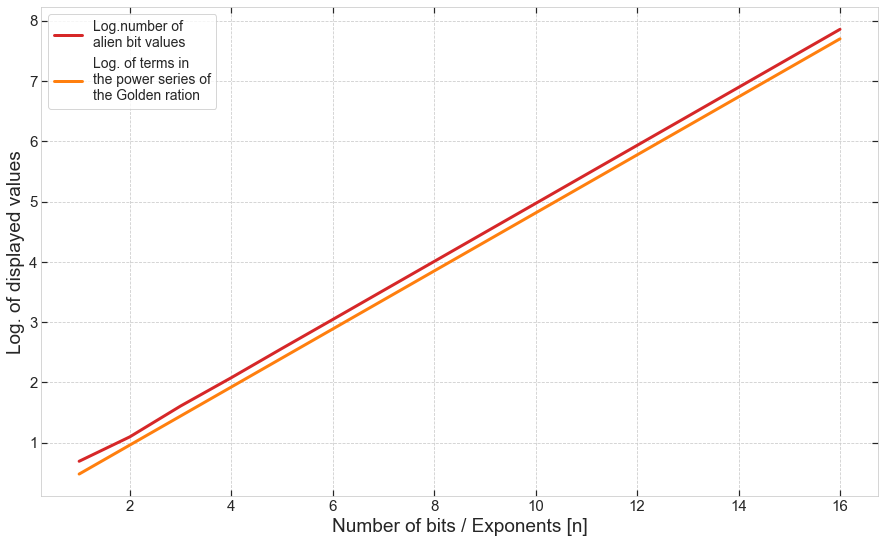

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,9))

axislabelsize = 19
axisticksize = 15
axislegendsize = 14

axes.plot(range(1,17), np.log(a), label='Log.number of\nalien bit values',
          color='tab:red', lw=3)
axes.plot(range(1,17), np.log(g_list), label='Log. of terms in\nthe power series of\nthe Golden ration',
          color='tab:orange', lw=3)

axes.set_xlabel('Number of bits / Exponents [n]', fontsize=axislabelsize)
axes.set_ylabel('Log. of displayed values', fontsize=axislabelsize)
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

axes.legend(loc='upper left', fontsize=axislegendsize)

plt.show()

Both of these series are simply exponential, hence their linear behaviour on a logarithmic scale.